# Ukraine: Humanitarian Needs Overview

### Import libraries for data processing, cleaning, and visualizations

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline
#render interactive plots within notebook

In [ ]:
hno_url = "https://data.humdata.org/dataset/019de7ad-8043-4755-b1fb-f84ce4b961a5/resource/9865aa90-d0a4-4d78-845d-3fffa67be0be/download/ukraine-2023-hno-pin-and-severity-for-hdx-20230215.xlsx"
conflicts_url = "https://data.humdata.org/dataset/7b36830b-c033-4a06-b812-9940baec603b/resource/e122ca1c-9463-4e3a-8731-8a85fab2a15e/download/ukraine_hrp_political_violence_events_and_fatalities_by_month-year_as-of-22may2024.xlsx"


resp_hno = requests.get(hno_url)
if resp_hno.status_code == 200:
    with open('./data/HNO.xlsx', 'wb') as output:
        output.write(resp_hno.content)
else:
    print(f'Failed to download file: {resp_hno.status_code}')
    
resp_conflicts = requests.get(conflicts_url)
if resp_conflicts.status_code == 200:
    with open('./data/Conflicts.xlsx', 'wb') as output:
        output.write(resp_conflicts.content)
else:
    print(f'Failed to download file: {resp_conflicts.status_code}')
    


### Creating DataFrames

In [2]:
hno2023_overall = pd.read_excel(open('./data/HNO.xlsx', 'rb'), sheet_name='Overall Affected PIN By Oblast')
hno2023_severity = pd.read_excel(open('./data/HNO.xlsx', 'rb'),sheet_name='Severity by Raion {<> ED WA}')
hno2023_cluster = pd.read_excel(open('./data/HNO.xlsx', 'rb'),sheet_name='Cluster PIN By Oblast')


In [3]:
conflicts_events = pd.read_excel(open('./data/Conflicts.xlsx','rb'), sheet_name='Data')

### Data Cleaning and Exploratory Data Analysis

In [4]:
hno2023_severity.head(5)

,UKRAINE 2023 Humanitarain Needs Overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Severity of Needs by Cluster and Raion (Exclud...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geography,NaN,NaN,NaN,NaN,NaN,Severity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Raion [EN],Raion [UK],Raion PCode,Oblast [EN],Oblast [UK],Oblast PCode,CCCM,Food Security \n& Livelihoods,Health,Protection,General Protection,Child Protection,Gender-based Violence,Mine Action,Shelter \n& NFIs,Intersectoral
4,#admin2 +name +en,#admin2 +name +uk,#admin2 +code,#admin1 +name +en,#admin1 +name +uk,#admin1 +code,#severity,#severity,#severity,#severity,#severity,#severity,#severity,#severity,#severity,#severity


In [5]:
hno2023_cluster.head(5)

,UKRAINE 2023 Humanitarain Needs Overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,PIN Estimates by Cluster and Oblast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geography,NaN,NaN,Baseline,Affected,Overall PIN by Cluster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overall PIN
3,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,CCCM,Education,Food Security \n& Livelihoods,Health,General Protection,Child Protection,Gender-based Violence,Mine Action,Shelter \n& NFIs,WASH,Intersectoral
4,#admin1 +name +en,#admin1 +name +uk,#admin1 +code,#population,#affected,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed,#inneed


#### From above we can see that the top several rows are not usable for our analysis, and needs to be reformatted

##### HNO Overall Reformatting

In [6]:
hno2023_overall.head(5)

,UKRAINE 2023 Humanitarain Needs Overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Overall Affected and Intersectoral PIN Estimat...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Geography,NaN,NaN,Baseline,Affected,Overall PIN
3,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,Intersectoral
4,#admin1 +name +en,#admin1 +name +uk,#admin1 +code,#population,#affected,#inneed


In [7]:
#Move column names from row 3 to df header
columns = hno2023_overall.iloc[3]
columns

UKRAINE 2023 Humanitarain Needs Overview             Oblast [EN]
Unnamed: 1                                           Oblast [UK]
Unnamed: 2                                          Oblast PCode
Unnamed: 3                                  Population Estimate 
Unnamed: 4                                                 Total
Unnamed: 5                                         Intersectoral
Name: 3, dtype: object

In [8]:
hno2023_overall.rename(columns=columns, inplace=True)

In [9]:
hno2023_overall.head(5)

,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,Intersectoral
0,Overall Affected and Intersectoral PIN Estimat...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Geography,NaN,NaN,Baseline,Affected,Overall PIN
3,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,Intersectoral
4,#admin1 +name +en,#admin1 +name +uk,#admin1 +code,#population,#affected,#inneed


In [10]:
hno2023_overall.drop(hno2023_overall.index[:5], inplace=True)
hno2023_overall.head(7)

,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,Intersectoral
5,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,0,0,0
6,Vinnytska,Вінницька,UA05,1502897.01127,742596.38241,544177.720298
7,Volynska,Волинська,UA07,1053028.377874,316455.658271,282378.0217
8,Dnipropetrovska,Дніпропетровська,UA12,2846031.525262,1521376.173724,1108874.82461
9,Donetska,Донецька,UA14,3207607.403857,2519848.763581,2569405.008819
10,Zhytomyrska,Житомирська,UA18,1146052.578999,818395.430863,574603.275957
11,Zakarpatska,Закарпатська,UA21,1288977.139867,610926.517274,427734.940268


In [11]:
hno2023_overall.reset_index(inplace=True, drop=True)
hno2023_overall.head(5)

,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,Intersectoral
0,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,0,0,0
1,Vinnytska,Вінницька,UA05,1502897.01127,742596.38241,544177.720298
2,Volynska,Волинська,UA07,1053028.377874,316455.658271,282378.0217
3,Dnipropetrovska,Дніпропетровська,UA12,2846031.525262,1521376.173724,1108874.82461
4,Donetska,Донецька,UA14,3207607.403857,2519848.763581,2569405.008819


##### HNO Cluster Reformatting

In [12]:
cluster_columns = hno2023_cluster.iloc[3]
cluster_columns

UKRAINE 2023 Humanitarain Needs Overview                      Oblast [EN]
Unnamed: 1                                                    Oblast [UK]
Unnamed: 2                                                   Oblast PCode
Unnamed: 3                                           Population Estimate 
Unnamed: 4                                                          Total
Unnamed: 5                                                           CCCM
Unnamed: 6                                                      Education
Unnamed: 7                                  Food Security \n& Livelihoods
Unnamed: 8                                                         Health
Unnamed: 9                                             General Protection
Unnamed: 10                                              Child Protection
Unnamed: 11                                         Gender-based Violence
Unnamed: 12                                                   Mine Action
Unnamed: 13                           

In [13]:

hno2023_cluster.rename(columns=cluster_columns, inplace=True)

hno2023_cluster.drop(hno2023_cluster.index[:5], inplace=True)
hno2023_cluster.reset_index(inplace=True, drop=True)

In [14]:
hno2023_cluster.head(5)

,Oblast [EN],Oblast [UK],Oblast PCode,Population Estimate,Total,CCCM,Education,Food Security \n& Livelihoods,Health,General Protection,Child Protection,Gender-based Violence,Mine Action,Shelter \n& NFIs,WASH,Intersectoral
0,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1,Vinnytska,Вінницька,UA05,1502897.01127,742596.38241,22991,217106.445691,434788.097556,468772.586955,544177.720298,109893.563598,141946.681946,277500,222790.811132,213758.59078,544177.720298
2,Volynska,Волинська,UA07,1053028.377874,316455.658271,22957,174672.373705,246198.023574,198538.560145,205427.174521,45197.090503,52034.971756,68044,101745.41401,146523.292455,282378.0217
3,Dnipropetrovska,Дніпропетровська,UA12,2846031.525262,1521376.173724,26748,417189.417937,850394.365194,1108874.82461,755629.367742,246434.895695,250841.566131,857977,628845.801482,726167.560248,1108874.82461
4,Donetska,Донецька,UA14,3207607.403857,2519848.763581,12000,227344.371513,1150248.015781,1782643.691347,2374346.767625,411982.225601,457513.513014,1589696,1534737.89997,2388968.168879,2569405.008819


##### HNO Severity Reformatting

In [15]:
severity_columns = hno2023_severity.iloc[3]
hno2023_severity.rename(columns=severity_columns, inplace=True)

hno2023_severity.drop(hno2023_severity.index[:5], inplace=True)
hno2023_severity.reset_index(inplace=True, drop=True)

In [16]:
hno2023_severity.head(5)

,Raion [EN],Raion [UK],Raion PCode,Oblast [EN],Oblast [UK],Oblast PCode,CCCM,Food Security \n& Livelihoods,Health,Protection,General Protection,Child Protection,Gender-based Violence,Mine Action,Shelter \n& NFIs,Intersectoral
0,Bakhchysaraiskyi,Бахчисарайський,UA0102,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bilohirskyi,Білогірський,UA0104,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dzhankoiskyi,Джанкойський,UA0106,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yevpatoriiskyi,Євпаторійський,UA0108,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kerchynskyi,Керченський,UA0110,Autonomous Republic of Crimea,Автономна Республіка Крим,UA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

In [17]:
hno2023_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Oblast [EN]           27 non-null     object
 1   Oblast [UK]           27 non-null     object
 2   Oblast PCode          27 non-null     object
 3   Population Estimate   27 non-null     object
 4   Total                 27 non-null     object
 5   Intersectoral         27 non-null     object
dtypes: object(6)
memory usage: 1.4+ KB


In [18]:
hno2023_overall.describe().T

,count,unique,top,freq
Oblast [EN],27,27,Autonomous Republic of Crimea,1
Oblast [UK],27,26,Київська,2
Oblast PCode,27,27,UA01,1
Population Estimate,27,26,0,2
Total,27,26,0,2
Intersectoral,27,26,0,2


In [19]:
hno2023_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Oblast [EN]                   27 non-null     object
 1   Oblast [UK]                   27 non-null     object
 2   Oblast PCode                  27 non-null     object
 3   Population Estimate           25 non-null     object
 4   Total                         27 non-null     object
 5   CCCM                          27 non-null     object
 6   Education                     27 non-null     object
 7   Food Security 
& Livelihoods  27 non-null     object
 8   Health                        27 non-null     object
 9   General Protection            27 non-null     object
 10  Child Protection              27 non-null     object
 11  Gender-based Violence         27 non-null     object
 12  Mine Action                   27 non-null     object
 13  Shelter 
& NFIs       

In [20]:
hno2023_cluster.describe().T

,count,unique,top,freq
Oblast [EN],27,27,Autonomous Republic of Crimea,1
Oblast [UK],27,26,Київська,2
Oblast PCode,27,27,UA01,1
Population Estimate,25.0,25.0,1502897.01127,1.0
Total,27,26,0,2
CCCM,27,22,0,3
Education,27,26,0,2
Food Security \n& Livelihoods,27,26,0,2
Health,27,26,0,2
General Protection,27,26,0,2


In [21]:
hno2023_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Raion [EN]                    139 non-null    object
 1   Raion [UK]                    139 non-null    object
 2   Raion PCode                   139 non-null    object
 3   Oblast [EN]                   139 non-null    object
 4   Oblast [UK]                   139 non-null    object
 5   Oblast PCode                  139 non-null    object
 6   CCCM                          128 non-null    object
 7   Food Security 
& Livelihoods  128 non-null    object
 8   Health                        128 non-null    object
 9    Protection                   128 non-null    object
 10  General Protection            128 non-null    object
 11  Child Protection              128 non-null    object
 12  Gender-based Violence         127 non-null    object
 13  Mine Action         

In [22]:
hno2023_severity.describe().T

,count,unique,top,freq
Raion [EN],139,139,Bakhchysaraiskyi,1
Raion [UK],139,139,Бахчисарайський,1
Raion PCode,139,139,UA0102,1
Oblast [EN],139,27,Autonomous Republic of Crimea,10
Oblast [UK],139,26,Автономна Республіка Крим,10
Oblast PCode,139,27,UA01,10
CCCM,128,3,4,66
Food Security \n& Livelihoods,128,2,3,110
Health,128,3,4,66
Protection,128,4,3,62


#### Handling missing values

In [23]:
hno2023_cluster.replace(0, np.nan, inplace=True)
hno2023_overall.replace(0, np.nan, inplace=True)


In [24]:
hno2023_cluster.isnull().sum()

Oblast [EN]                      0
Oblast [UK]                      0
Oblast PCode                     0
Population Estimate              2
Total                            2
CCCM                             3
Education                        2
Food Security \n& Livelihoods    2
Health                           2
General Protection               2
Child Protection                 2
Gender-based Violence            2
Mine Action                      2
Shelter \n& NFIs                 2
WASH                             2
Intersectoral                    2
dtype: int64

In [25]:
hno2023_overall.isnull().sum()

Oblast [EN]             0
Oblast [UK]             0
Oblast PCode            0
Population Estimate     2
Total                   2
Intersectoral           2
dtype: int64

In [26]:
hno2023_severity.isnull().sum()

Raion [EN]                        0
Raion [UK]                        0
Raion PCode                       0
Oblast [EN]                       0
Oblast [UK]                       0
Oblast PCode                      0
CCCM                             11
Food Security \n& Livelihoods    11
Health                           11
 Protection                      11
General Protection               11
Child Protection                 11
Gender-based Violence            12
Mine Action                      11
Shelter \n& NFIs                 12
Intersectoral                    11
dtype: int64

## HNO Visualizations

In [27]:
oblast_code = hno2023_cluster["Oblast PCode"].unique()
oblast_code

array(['UA01', 'UA05', 'UA07', 'UA12', 'UA14', 'UA18', 'UA21', 'UA23',
       'UA26', 'UA32', 'UA35', 'UA44', 'UA46', 'UA48', 'UA51', 'UA53',
       'UA56', 'UA59', 'UA61', 'UA63', 'UA65', 'UA68', 'UA71', 'UA73',
       'UA74', 'UA80', 'UA85'], dtype=object)

In [28]:
cluster_names = hno2023_cluster.columns[5:-1]
cluster_names

Index(['CCCM', 'Education', 'Food Security \n& Livelihoods', 'Health',
       'General Protection', 'Child Protection', 'Gender-based Violence',
       'Mine Action', 'Shelter \n& NFIs', 'WASH'],
      dtype='object')

#### HNO Cluster Population versus Oblast Region

C:\Users\tanve\AppData\Local\Temp\ipykernel_13444\990182404.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hno2023_cluster, x='Oblast PCode', y=column, ax=ax, palette='flare')
C:\Users\tanve\AppData\Local\Temp\ipykernel_13444\990182404.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\tanve\AppData\Local\Temp\ipykernel_13444\990182404.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hno2023_cluster, x='Oblast PCode', y=column, ax=ax, palette='flare')
C:\Users\tanve\AppData\Local\Temp\ipykernel_13444\990182404.py:13: UserWa

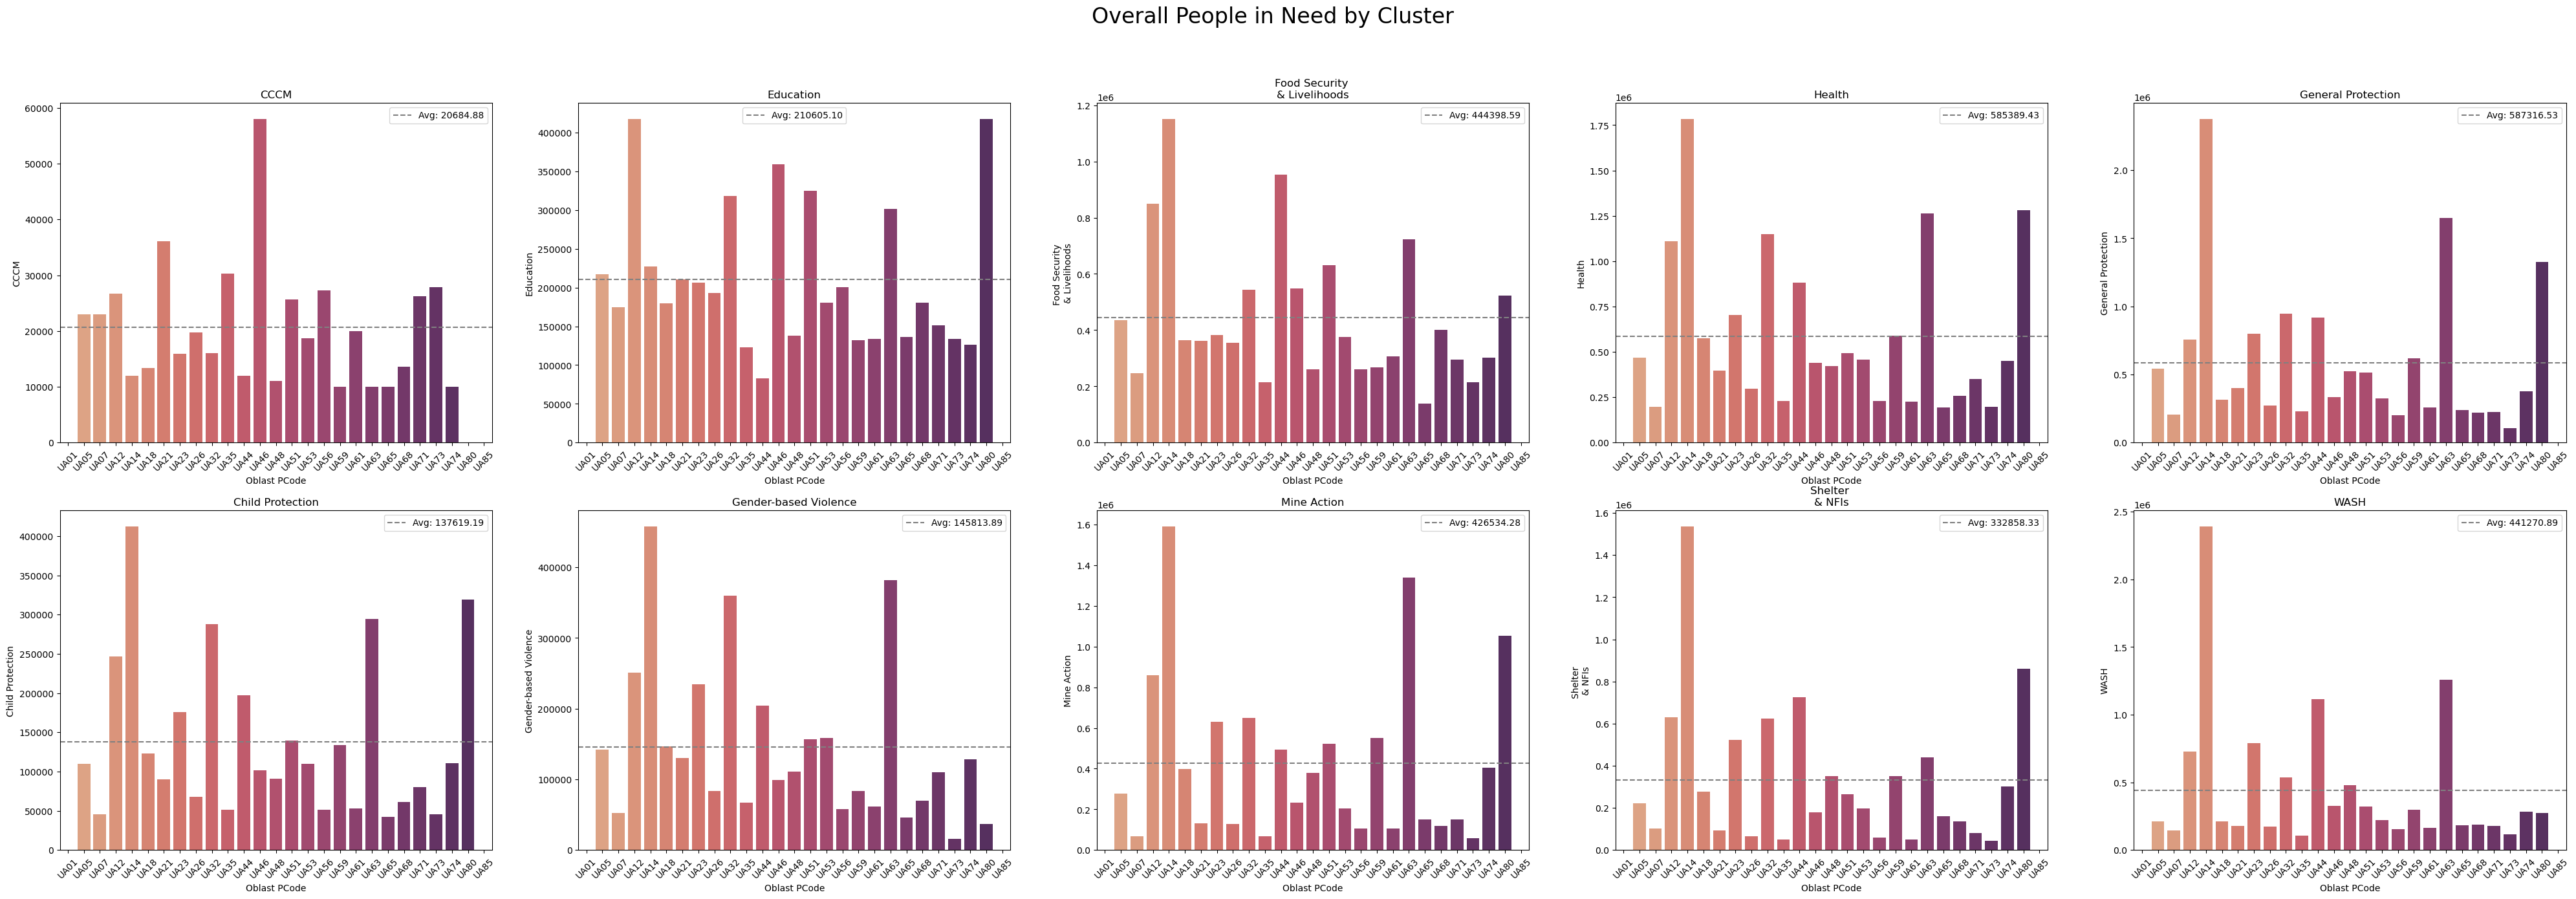

In [34]:
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(50,15))

for idx, column in enumerate(cluster_names):
    row = idx // num_cols
    col = idx % num_cols
    
    ax = axes[row, col]
    sns.barplot(data=hno2023_cluster, x='Oblast PCode', y=column, ax=ax, palette='flare')
    ax.set_title(f'{column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    average_pin = hno2023_cluster[column].mean()
    ax.axhline(y=average_pin, color='grey', linestyle='--', label=f'Avg: {average_pin:.2f}')
    ax.legend()
    
plt.suptitle("Overall People in Need by Cluster", fontsize=24)
plt.show()

#### HNO Cluster Correlation Heatmap

[Text(0.5, 1.0, 'Cluster Correlations')]

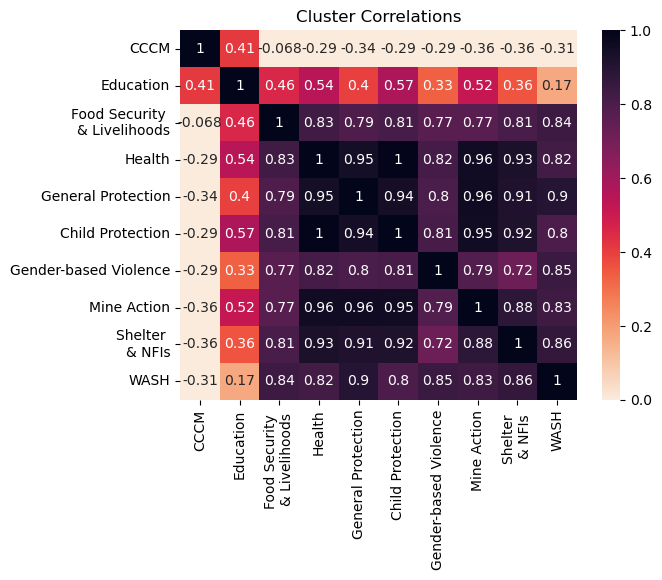

In [35]:
cluster_pin = hno2023_cluster[cluster_names]
fig, ax = plt.subplots()
sns.heatmap(cluster_pin.corr(), 
            cmap='rocket_r', 
            vmin=0, 
            vmax=1,
            annot=True
            ).set(title='Cluster Correlations')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

#### HNO Overall Affected Population (Oblast)

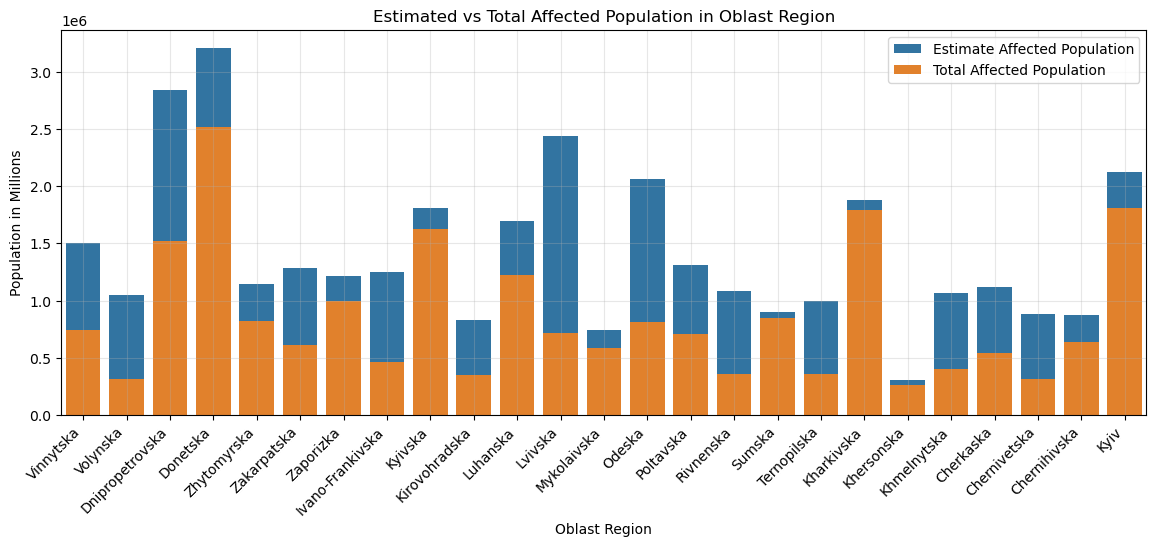

In [69]:
plt.figure(figsize=(14,5))
sns.barplot(y=hno2023_overall['Population Estimate '], 
              x=hno2023_overall['Oblast [EN]'].iloc[1:-1],
                label = 'Estimate Affected Population',
                # join=True
                )
sns.barplot(y=hno2023_overall['Total'], 
              x=hno2023_overall['Oblast [EN]'].iloc[1:-1],
                label = 'Total Affected Population',
                # join=True
                )
plt.title('Estimated vs Total Affected Population in Oblast Region')
plt.ylabel('Population in Millions')
plt.xlabel('Oblast Region')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', alpha=0.3)
plt.show()

In [70]:
flash_appeal_url = "https://data.humdata.org/dataset/019de7ad-8043-4755-b1fb-f84ce4b961a5/resource/27542466-1fdc-49cb-889a-9bb0392d0cb4/download/ukraine-flash-appeal_-april-revision-march-august-2022.xlsx"
resp_flash_appeal = requests.get(flash_appeal_url)

if resp_flash_appeal.status_code == 200:
    with open('./data/FlashAppeal.xlsx', 'wb') as output:
        output.write(resp_flash_appeal.content)
else:
    print(f'Failed to download file: {resp_flash_appeal.status_code}')
